In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 27.7 MB/s 
     |████████████████████████████████| 1.2 MB 18.8 MB/s 
     |████████████████████████████████| 120 kB 44.2 MB/s 
     |████████████████████████████████| 213 kB 43.9 MB/s 
     |████████████████████████████████| 6.3 MB 30.3 MB/s 
     |████████████████████████████████| 596 kB 27.6 MB/s 
     |████████████████████████████████| 103 kB 27.8 MB/s 
     |████████████████████████████████| 840 kB 18.1 MB/s 
     |████████████████████████████████| 87 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 67.0 MB/s 
     |████████████████████████████████| 1.1 MB 32.6 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 47.6 MB 32 kB/s 
     |████████████████████████████████| 352 kB 68.4 MB/s 
     |████████████████████████████████| 99 kB 8.0 MB/s 
     |████████████████████████████████| 207 kB 63.5 MB/s 


In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [3]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

228827136/228813984 [==============================] - 4s 0us/step


In [4]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [5]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

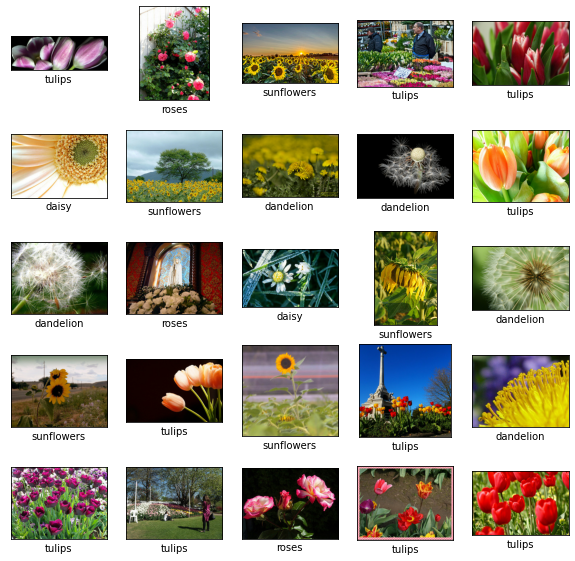

In [6]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [7]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
91/91 [==============================] - 120s 1s/step - loss: 0.8982 - accuracy: 0.7579 - val_loss: 0.6600 - val_accuracy: 0.9006
Epoch 2/5
91/91 [==============================] - 117s 1s/step - loss: 0.6615 - accuracy: 0.8939 - val_loss: 0.6267 - val_accuracy: 0.9091
Epoch 3/5
91/91 [==============================] - 117s 1s/step - loss: 0.6300 - accuracy: 0.9104 - val_loss: 0.6164 - val_accuracy: 0.9091
Epoch 4/5
91/91 [==============================] - 116s 1s/step - loss: 0.6072 - accuracy: 0.9241 - val_loss: 0.6073 - val_accuracy: 0.9148
Epoch 5/5
91/91 [==============================] - 117s 1s/step - loss: 0.5905 - accuracy: 0.9344 - val_loss: 0.6089 - val_accuracy: 0.9062


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [9]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 16s 1s/step - loss: 0.6104 - accuracy: 0.9210


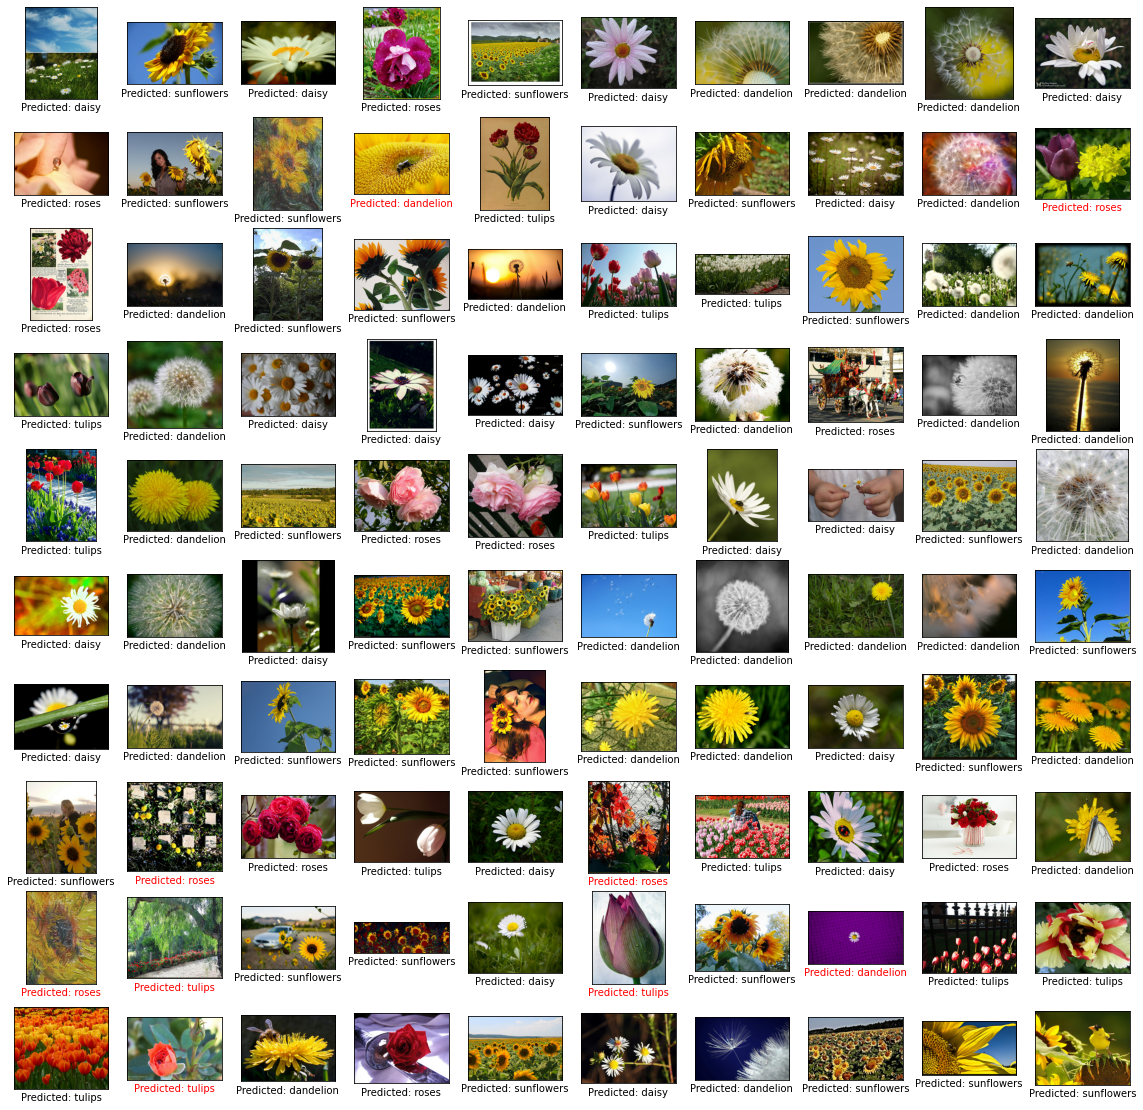

In [10]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [11]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpmw33ohoc/assets


INFO:tensorflow:Assets written to: /tmp/tmpmw33ohoc/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpy7x2ihzf/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpy7x2ihzf/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [12]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [13]:
model.evaluate_tflite('model.tflite', test_data)


{'accuracy': 0.9128065395095368}

In [14]:
config = QuantizationConfig.for_float16()

In [15]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp6h0t649m/assets


INFO:tensorflow:Assets written to: /tmp/tmp6h0t649m/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpebwy7dky/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpebwy7dky/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In [16]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


91/91 [==============================] - 104s 1s/step - loss: 0.9200 - accuracy: 0.7668 - val_loss: 0.7516 - val_accuracy: 0.8409
Epoch 2/5
91/91 [==============================] - 101s 1s/step - loss: 0.6853 - accuracy: 0.8867 - val_loss: 0.7163 - val_accuracy: 0.8494
Epoch 3/5
91/91 [==============================] - 100s 1s/step - loss: 0.6459 - accuracy: 0.9083 - val_loss: 0.7003 - val_accuracy: 0.8494
Epoch 4/5
91/91 [==============================] - 100s 1s/step - loss: 0.6231 - accuracy: 0.9210 - val_loss: 0.6808 - val_accuracy: 0.8665
Epoch 5/5
91/91 [==============================] - 100s 1s/step - loss: 0.6034 - accuracy: 0.9299 - val_loss: 0.6797 - val_accuracy: 0.8665


In [17]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 14s 864ms/step - loss: 0.6911 - accuracy: 0.8883


In [18]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

In [19]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


91/91 [==============================] - 120s 1s/step - loss: 0.8864 - accuracy: 0.7627 - val_loss: 0.6650 - val_accuracy: 0.8835
Epoch 2/10
91/91 [==============================] - 117s 1s/step - loss: 0.6608 - accuracy: 0.8901 - val_loss: 0.6277 - val_accuracy: 0.9062
Epoch 3/10
91/91 [==============================] - 117s 1s/step - loss: 0.6274 - accuracy: 0.9062 - val_loss: 0.6170 - val_accuracy: 0.9091
Epoch 4/10
91/91 [==============================] - 117s 1s/step - loss: 0.6039 - accuracy: 0.9248 - val_loss: 0.6079 - val_accuracy: 0.9176
Epoch 5/10
91/91 [==============================] - 117s 1s/step - loss: 0.5906 - accuracy: 0.9354 - val_loss: 0.6099 - val_accuracy: 0.9148
Epoch 6/10
91/91 [==============================] - 116s 1s/step - loss: 0.5810 - accuracy: 0.9385 - val_loss: 0.6091 - val_accuracy: 0.9148
Epoch 7/10
91/91 [==============================] - 116s 1s/step - loss: 0.5732 - accuracy: 0.9423 - val_loss: 0.6089 - val_accuracy: 0.9176
Epoch 8/10
91/91 [======

In [20]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 16s 1s/step - loss: 0.6105 - accuracy: 0.9101
